# Bonos e Historialización


In [1]:
import os
import sys

os.getcwd()
sys.path.append("../")

In [2]:
import src.api.client as client
import src.api.constants as constants

Se recomienda usar el archivo `.env` para colocar claves privadas, pero este espacio tambien puede ser usado como punto de entrada de datos privados. Tener la debida precaución.


In [3]:
user = os.getenv("IOL_USER") or ""
password = os.getenv("IOL_PASS") or ""

In [4]:
client_iol = client.IOLClient(username=user, password=password)

## Historico anual de un determinado instrumento


In [5]:
from datetime import date
from src.api.constants import Ajustada

hoy = date.today()
hace_un_anio = hoy.replace(year=hoy.year - 1)
historico = await client_iol.get_titulo_historicos(
    simbolo="GGAL",
    mercado=constants.Mercado.BCBA,
    fecha_desde=hace_un_anio,
    fecha_hasta=hoy,
    ajustada=Ajustada.AJUSTADA,
)

In [6]:
import pandas as pd

df = pd.DataFrame(data=historico)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,905.80,0.0,930.50,930.50,892.0,2023-07-19T17:00:01.95,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,919.40,0.0,938.45,955.00,913.8,2023-07-18T17:00:01.897,sube,0.0,1.470814e+09,1593873,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,920.15,0.0,910.30,950.00,910.3,2023-07-17T17:00:02.68,sube,0.0,1.201918e+09,1297316,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,885.80,0.0,915.80,918.90,870.0,2023-07-14T17:00:01.537,sube,0.0,1.349926e+09,1518114,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,917.85,0.0,875.00,925.85,875.0,2023-07-13T17:00:01.87,sube,0.0,2.103226e+09,4898,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


## Guardando los datos


Exportamos datos a un excel


In [7]:
# df.to_excel("historico.xlsx")

Leer datos desde excel

In [8]:
# df = pd.read_excel("historico.xlsx")

## Analisis y visualización


Primera vista de los datos


In [9]:
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,905.80,0.0,930.50,930.50,892.0,2023-07-19T17:00:01.95,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,919.40,0.0,938.45,955.00,913.8,2023-07-18T17:00:01.897,sube,0.0,1.470814e+09,1593873,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,920.15,0.0,910.30,950.00,910.3,2023-07-17T17:00:02.68,sube,0.0,1.201918e+09,1297316,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,885.80,0.0,915.80,918.90,870.0,2023-07-14T17:00:01.537,sube,0.0,1.349926e+09,1518114,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,917.85,0.0,875.00,925.85,875.0,2023-07-13T17:00:01.87,sube,0.0,2.103226e+09,4898,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


Cantidad de registros encontrados


In [10]:
df.size

4900

Graficando variables en función del tiempo

In [11]:
df.set_index("fechaHora", inplace=True)
df.head()


,ultimoPrecio,variacion,apertura,maximo,minimo,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
fechaHora,,,,,,,,,,,,,,,,,,,
2023-07-19T17:00:01.95,905.80,0.0,930.50,930.50,892.0,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-18T17:00:01.897,919.40,0.0,938.45,955.00,913.8,sube,0.0,1.470814e+09,1593873,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-17T17:00:02.68,920.15,0.0,910.30,950.00,910.3,sube,0.0,1.201918e+09,1297316,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-14T17:00:01.537,885.80,0.0,915.80,918.90,870.0,sube,0.0,1.349926e+09,1518114,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-13T17:00:01.87,917.85,0.0,875.00,925.85,875.0,sube,0.0,2.103226e+09,4898,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


In [12]:
up = df['ultimoPrecio']
up.head()

fechaHora
2023-07-19T17:00:01.95     905.80
2023-07-18T17:00:01.897    919.40
2023-07-17T17:00:02.68     920.15
2023-07-14T17:00:01.537    885.80
2023-07-13T17:00:01.87     917.85
Name: ultimoPrecio, dtype: float64

In [17]:
up = up.sort_index(ascending=True)
up

fechaHora
2022-07-20T17:00:01.823    189.15
2022-07-21T17:00:02.117    199.35
2022-07-22T17:00:02.04     201.55
2022-07-25T17:00:02.143    214.35
2022-07-26T17:00:02.013    214.50
                            ...  
2023-07-13T17:00:01.87     917.85
2023-07-14T17:00:01.537    885.80
2023-07-17T17:00:02.68     920.15
2023-07-18T17:00:01.897    919.40
2023-07-19T17:00:01.95     905.80
Name: ultimoPrecio, Length: 245, dtype: float64

<Axes: xlabel='fechaHora'>

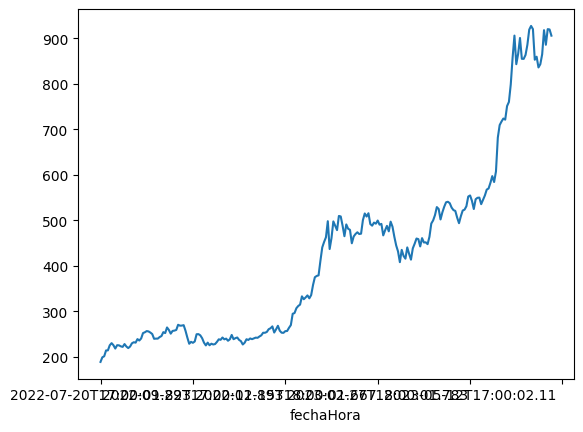

In [18]:
up.plot.line()